## Задание №9

|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|<!-- -->|
|:------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| цифра  | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| кол-во | 5 | 8 | 6 | 12| 14| 18| 11| 6 | 13| 7 |

n = 100

## a) 
Проверить гипотезу о согласии данных с законом равномерного рас-пределения с помощью критерия $\chi^2 $ и с помощью критерия Колмо-горова. Сравнить результаты.

$H_0: \;\; \xi\thicksim R(0.5,9.5)$  
$H_1: \;\; \overline H_0$  
$p_0 = p_1 = ... = p_9 = 0.1 $  
$ \tilde P(A_i) = \mathcal{V}_i $  
$ \tilde \Delta = \sum_{i}^{m}\frac{(m_i -n p_i)^2}{n p_i}$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
n = 100
p = 1/10
alpha = 0.05
data = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
nu = data/100
tilde_delta = np.sum((data - p*n)**2/(n*p))
print(f'Дельта с волной = {tilde_delta}')

Дельта с волной = 16.4


<!-- Картинка -->
<img src="./.data/ex_9_1.jpg" width="300px">

<!-- Картинка -->
<img src="./.data/ex_9_2.jpg" width="400px">

### По критерию Колмогорова

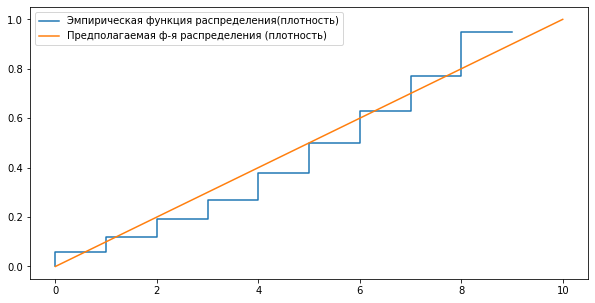

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.step(np.linspace(0.5, 9.5, 10) - 0.5, np.cumsum(np.sort(data/np.sum(data))) - 0.05, label='Эмпирическая функция распределения(плотность)')
plt.plot([0, 10], [0,1], label='Предполагаемая ф-я распределения (плотность)')
ax.legend()
plt.show()

<!-- Картинка -->
<img src="./.data/ex_9_3.jpg" width="400px">

In [18]:
cumulative_sum = np.cumsum(np.sort(data/np.sum(data))) - 0.05
tilde_delta = np.sqrt(n) * np.max([np.max([abs(cumulative_sum[i] - 1/10*i), abs(cumulative_sum[i] - 1/10*i) ]) for i in range(10 - 1)])

print(f'Дельта с волной = {tilde_delta}')

k = 100
kolmog_sum = 0

for i in range(1, k + 1):
    kolmog_sum += (-1) ** i * np.exp(-2 * i ** (2) * tilde_delta ** 2)

kolmog_sum = 1 + 2 * kolmog_sum
p_val = 1 - kolmog_sum
print(f'p-value = {p_val}')

Дельта с волной = 1.3
p-value = 0.06809222184476638


p-value > 0.05 => нет оснований отвергнуть $H_0$

## b) 
Проверить гипотезу о согласии данных с законом нормального рас-пределения с помощью критерия $\chi^2 $ (оценки неизвестных параметров определить численно, максимизируя функцию правдоподобия, построенную по группированной выборке) и с помощью критерия Колмогорова (распределение критерия определить бутстрапом). Сравнить результаты.

### По $\chi^2 $